Different Python plotting libraries -
- Simple plotting: matplotlib, seaborn
- Statistical plotting: seaborn, plotly, ggplot
- Interactive dashboards: plotly, bokeh, dash
- Geospatial data: folium, geopandas
- 3D plotting: mayavi, plotly
- Animation: matplotlib (with FuncAnimation), plotly

In [28]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf


In [5]:
df = pd.read_csv("../data/datasets.csv", parse_dates=["Date"])
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ONGC,EQ,207.70,205.0,214.4,205.0,214.0,213.45,209.91,9600,2.015090e+11,NaN,NaN,NaN
1,2000-01-04,ONGC,EQ,213.45,201.5,209.7,201.0,209.0,206.55,206.26,17900,3.692030e+11,NaN,NaN,NaN
2,2000-01-05,ONGC,EQ,206.55,201.0,223.1,200.5,223.1,223.10,215.46,27000,5.817490e+11,NaN,NaN,NaN
3,2000-01-06,ONGC,EQ,223.10,234.0,234.9,217.6,217.6,219.30,223.42,35600,7.953680e+11,NaN,NaN,NaN
4,2000-01-07,ONGC,EQ,219.30,223.0,223.0,213.0,215.7,215.75,215.19,11400,2.453145e+11,NaN,NaN,NaN


In [7]:
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,ONGC,EQ,207.70,205.0,214.4,205.0,214.0,213.45,209.91,9600,2.015090e+11,NaN,NaN,NaN
2000-01-04,2000-01-04,ONGC,EQ,213.45,201.5,209.7,201.0,209.0,206.55,206.26,17900,3.692030e+11,NaN,NaN,NaN
2000-01-05,2000-01-05,ONGC,EQ,206.55,201.0,223.1,200.5,223.1,223.10,215.46,27000,5.817490e+11,NaN,NaN,NaN
2000-01-06,2000-01-06,ONGC,EQ,223.10,234.0,234.9,217.6,217.6,219.30,223.42,35600,7.953680e+11,NaN,NaN,NaN
2000-01-07,2000-01-07,ONGC,EQ,219.30,223.0,223.0,213.0,215.7,215.75,215.19,11400,2.453145e+11,NaN,NaN,NaN


In [20]:
sb.set_theme()
sb.set(rc={'figure.figsize':(15,8)})
fig = px.line(df, x='Date', y="Volume")  #Plot Volume by Date
# fig = px.scatter(df, x="Date", y="Volume", color="Date", size="Volume")
fig.show()

In [23]:
fig = px.line(df, x='Date', y="High")  #Plot High values by Date
fig.show()

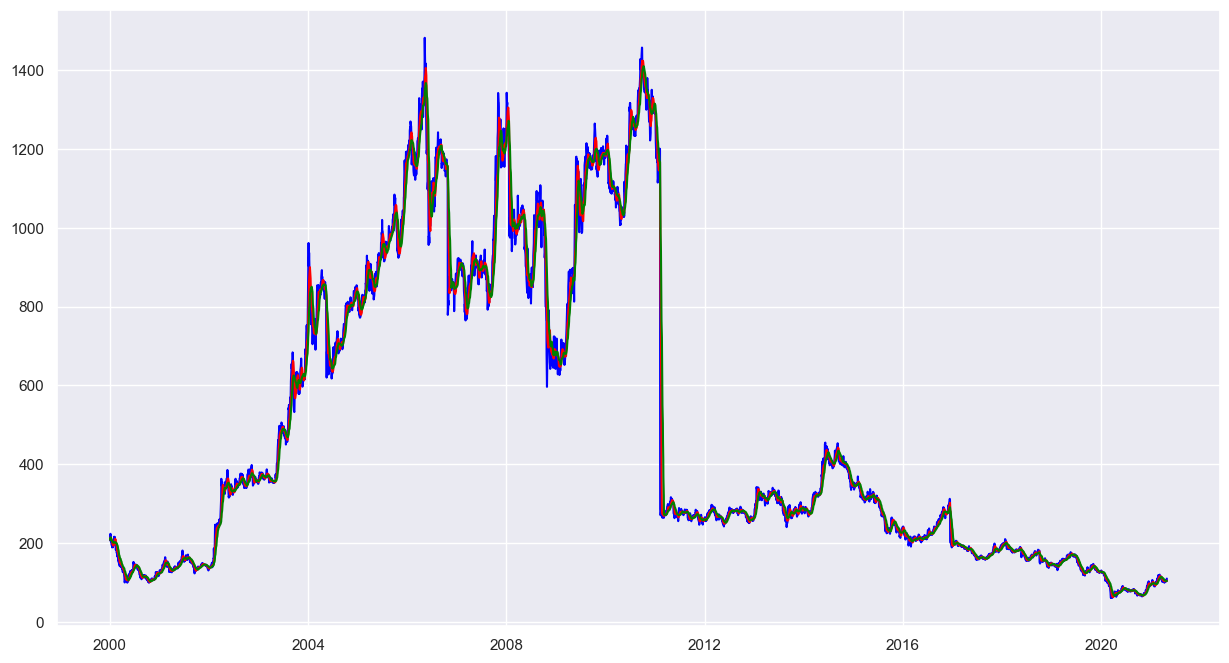

In [22]:
df_sma=df.copy()
df_sma['SMA_10']=df_sma.VWAP.rolling(10, min_periods=1).mean()  # Calculate the simple moving average over 10 days
df_sma['SMA_20']=df_sma.VWAP.rolling(20, min_periods=1).mean() # Calculate the simple moving average over 20 days

plt.plot(df_sma['Date'], df_sma['VWAP'], color='blue')
plt.plot(df_sma['Date'],df_sma['SMA_10'], color='red')
plt.plot(df_sma['Date'],df_sma['SMA_20'], color='green')
plt.show()

/var/folders/6j/sm824zzx165frdzyv9cvh3p80000gn/T/ipykernel_24589/151979900.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





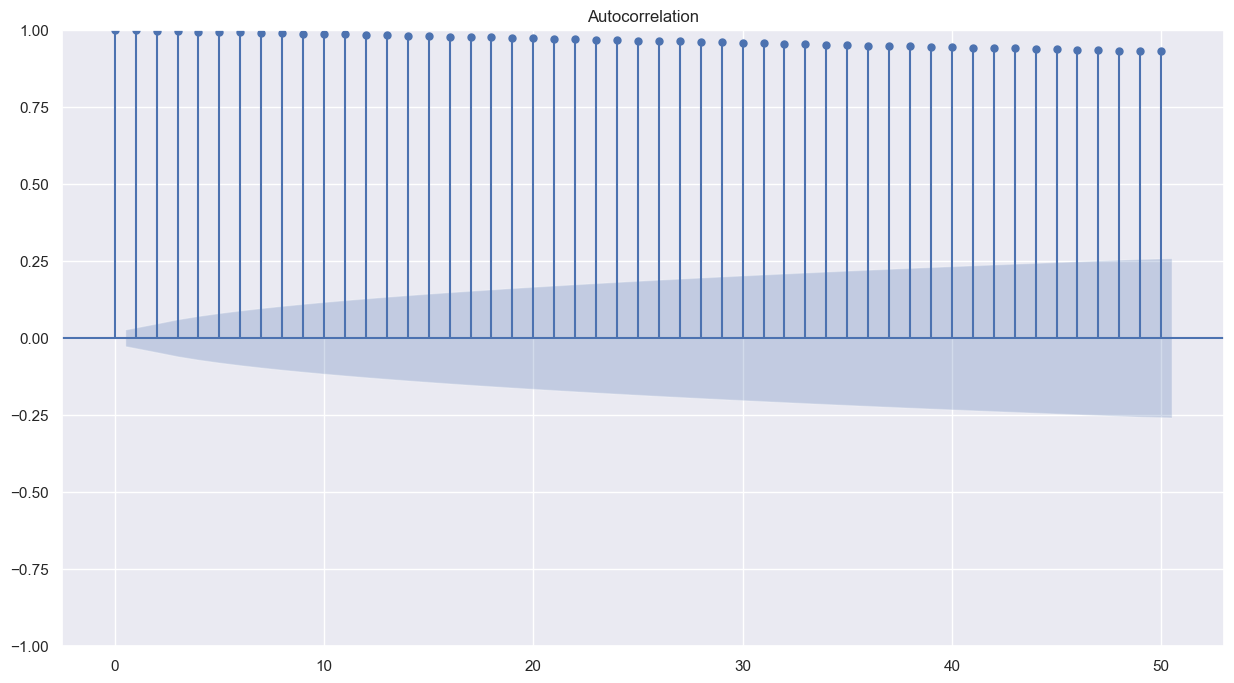

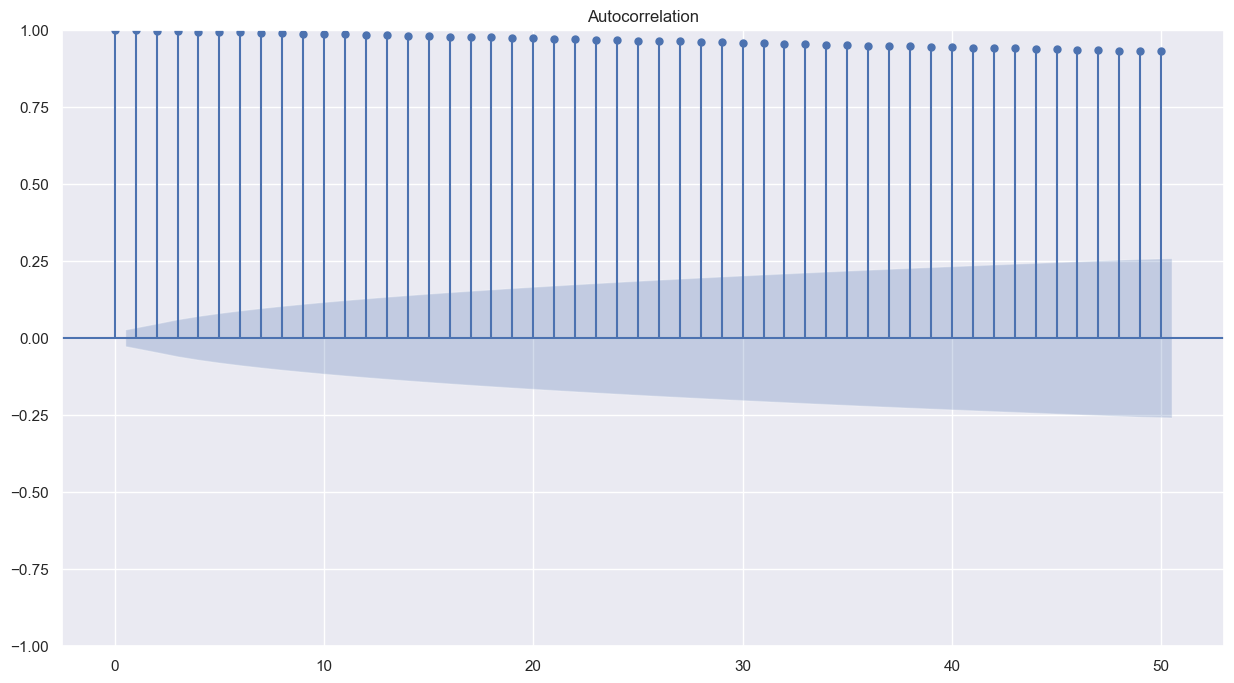

In [32]:
df.isnull().sum()
df['VWAP'].interpolate(method='linear',axis=0,inplace=True)  # Add in any missing values. With the current option, linearly interpolate between points
plot_acf(df['VWAP'], lags=50)